In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf #it binds matplot with pandas
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium


In [3]:
df = pd.read_csv(r"E:\DataAnalysisProjects-master\covid19_tweets.csv")
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166651,LynnZ,NaN,UT Austin Alum/Real Estate Developer & Designe...,2015-09-17 02:09:12,28488,18845,160631,False,2020-08-22 00:16:13,@SarahHuckabee @KellyannePolls Snapshot of our...,NaN,Twitter for iPhone,False
166652,Public Health is the Economy,"Sarasota, FL",All the marketing or growth hacks in the world...,2016-08-12 20:39:08,10875,7351,500315,False,2020-08-22 00:16:08,Ignoring your core civic duty to fellow Florid...,['covid19'],Twitter for Android,False
166653,"Farheen Qurashi, MD","Baltimore, MD","(She/Her) Trauma/Critical Care Surgeon. Wife, ...",2020-08-03 12:37:00,35,118,769,False,2020-08-22 00:16:03,"When people around me do wat a mask, it makes ...","['MaskUp', 'COVID19']",Twitter for iPhone,False
166654,Alf O'Kenney,"Montréal, QC",Dans ses écrits / un sage italien / dit que le...,2019-10-08 14:12:37,13,139,101,False,2020-08-22 00:16:00,Stream of #COVID19 thoughts:\n\n• First waves ...,['COVID19'],Twitter for Android,False


In [4]:
df.isnull().count()

user_name           166656
user_location       166656
user_description    166656
user_created        166656
user_followers      166656
user_friends        166656
user_favourites     166656
user_verified       166656
date                166656
text                166656
hashtags            166656
source              166656
is_retweet          166656
dtype: int64

In [5]:
df.dropna()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166646,🦇 𝖊𝖒𝖕𝖗𝖊𝖘𝖘𝖇𝖆𝖙 🦇 published a book,"Queensland, Australia","fighting #cybercrime 1 phish at a time, multi ...",2011-09-03 12:25:58,1549,2639,10525,False,2020-08-22 00:16:30,#COVID19 - #Qld tightens restrictions after re...,"['COVID19', 'Qld']",Twitter Web App,False
166647,Max Tysall,"Buchlyvie, Scotland",16 years old ✌🏼 Cerebral Palsy ✌🏼 Scottish 🏴󠁧󠁢...,2014-05-28 19:21:40,53,115,118,False,2020-08-22 00:16:26,how’s everyone doing? #hello #1am #cantsleep h...,"['hello', '1am', 'cantsleep', 'life', 'convers...",Twitter for iPhone,False
166652,Public Health is the Economy,"Sarasota, FL",All the marketing or growth hacks in the world...,2016-08-12 20:39:08,10875,7351,500315,False,2020-08-22 00:16:08,Ignoring your core civic duty to fellow Florid...,['covid19'],Twitter for Android,False
166653,"Farheen Qurashi, MD","Baltimore, MD","(She/Her) Trauma/Critical Care Surgeon. Wife, ...",2020-08-03 12:37:00,35,118,769,False,2020-08-22 00:16:03,"When people around me do wat a mask, it makes ...","['MaskUp', 'COVID19']",Twitter for iPhone,False


In [6]:
pd.DatetimeIndex(df['date']).month.unique()

Int64Index([7, 8], dtype='int64', name='date')

In [7]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166651,LynnZ,NaN,UT Austin Alum/Real Estate Developer & Designe...,2015-09-17 02:09:12,28488,18845,160631,False,2020-08-22 00:16:13,@SarahHuckabee @KellyannePolls Snapshot of our...,NaN,Twitter for iPhone,False
166652,Public Health is the Economy,"Sarasota, FL",All the marketing or growth hacks in the world...,2016-08-12 20:39:08,10875,7351,500315,False,2020-08-22 00:16:08,Ignoring your core civic duty to fellow Florid...,['covid19'],Twitter for Android,False
166653,"Farheen Qurashi, MD","Baltimore, MD","(She/Her) Trauma/Critical Care Surgeon. Wife, ...",2020-08-03 12:37:00,35,118,769,False,2020-08-22 00:16:03,"When people around me do wat a mask, it makes ...","['MaskUp', 'COVID19']",Twitter for iPhone,False
166654,Alf O'Kenney,"Montréal, QC",Dans ses écrits / un sage italien / dit que le...,2019-10-08 14:12:37,13,139,101,False,2020-08-22 00:16:00,Stream of #COVID19 thoughts:\n\n• First waves ...,['COVID19'],Twitter for Android,False


In [9]:
df.dropna()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166646,🦇 𝖊𝖒𝖕𝖗𝖊𝖘𝖘𝖇𝖆𝖙 🦇 published a book,"Queensland, Australia","fighting #cybercrime 1 phish at a time, multi ...",2011-09-03 12:25:58,1549,2639,10525,False,2020-08-22 00:16:30,#COVID19 - #Qld tightens restrictions after re...,"['COVID19', 'Qld']",Twitter Web App,False
166647,Max Tysall,"Buchlyvie, Scotland",16 years old ✌🏼 Cerebral Palsy ✌🏼 Scottish 🏴󠁧󠁢...,2014-05-28 19:21:40,53,115,118,False,2020-08-22 00:16:26,how’s everyone doing? #hello #1am #cantsleep h...,"['hello', '1am', 'cantsleep', 'life', 'convers...",Twitter for iPhone,False
166652,Public Health is the Economy,"Sarasota, FL",All the marketing or growth hacks in the world...,2016-08-12 20:39:08,10875,7351,500315,False,2020-08-22 00:16:08,Ignoring your core civic duty to fellow Florid...,['covid19'],Twitter for Android,False
166653,"Farheen Qurashi, MD","Baltimore, MD","(She/Her) Trauma/Critical Care Surgeon. Wife, ...",2020-08-03 12:37:00,35,118,769,False,2020-08-22 00:16:03,"When people around me do wat a mask, it makes ...","['MaskUp', 'COVID19']",Twitter for iPhone,False


In [10]:
ndf.interpolate()
ndf

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166651,LynnZ,NaN,UT Austin Alum/Real Estate Developer & Designe...,2015-09-17 02:09:12,28488,18845,160631,False,2020-08-22 00:16:13,@SarahHuckabee @KellyannePolls Snapshot of our...,NaN,Twitter for iPhone,False
166652,Public Health is the Economy,"Sarasota, FL",All the marketing or growth hacks in the world...,2016-08-12 20:39:08,10875,7351,500315,False,2020-08-22 00:16:08,Ignoring your core civic duty to fellow Florid...,['covid19'],Twitter for Android,False
166653,"Farheen Qurashi, MD","Baltimore, MD","(She/Her) Trauma/Critical Care Surgeon. Wife, ...",2020-08-03 12:37:00,35,118,769,False,2020-08-22 00:16:03,"When people around me do wat a mask, it makes ...","['MaskUp', 'COVID19']",Twitter for iPhone,False
166654,Alf O'Kenney,"Montréal, QC",Dans ses écrits / un sage italien / dit que le...,2019-10-08 14:12:37,13,139,101,False,2020-08-22 00:16:00,Stream of #COVID19 thoughts:\n\n• First waves ...,['COVID19'],Twitter for Android,False


In [12]:
df.dropna()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166646,🦇 𝖊𝖒𝖕𝖗𝖊𝖘𝖘𝖇𝖆𝖙 🦇 published a book,"Queensland, Australia","fighting #cybercrime 1 phish at a time, multi ...",2011-09-03 12:25:58,1549,2639,10525,False,2020-08-22 00:16:30,#COVID19 - #Qld tightens restrictions after re...,"['COVID19', 'Qld']",Twitter Web App,False
166647,Max Tysall,"Buchlyvie, Scotland",16 years old ✌🏼 Cerebral Palsy ✌🏼 Scottish 🏴󠁧󠁢...,2014-05-28 19:21:40,53,115,118,False,2020-08-22 00:16:26,how’s everyone doing? #hello #1am #cantsleep h...,"['hello', '1am', 'cantsleep', 'life', 'convers...",Twitter for iPhone,False
166652,Public Health is the Economy,"Sarasota, FL",All the marketing or growth hacks in the world...,2016-08-12 20:39:08,10875,7351,500315,False,2020-08-22 00:16:08,Ignoring your core civic duty to fellow Florid...,['covid19'],Twitter for Android,False
166653,"Farheen Qurashi, MD","Baltimore, MD","(She/Her) Trauma/Critical Care Surgeon. Wife, ...",2020-08-03 12:37:00,35,118,769,False,2020-08-22 00:16:03,"When people around me do wat a mask, it makes ...","['MaskUp', 'COVID19']",Twitter for iPhone,False


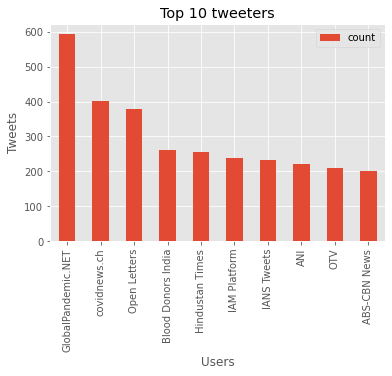

In [44]:
top_users=df.groupby('user_name')['user_location'].count().reset_index()
top_users.columns=['user_name','count']
top_users.sort_values('count',ascending=False,inplace=True)
top_users[0:10].plot(kind='bar',x='user_name',y='count')
plt.xlabel('Users')
plt.ylabel('Tweets')
plt.title('Top 10 tweeters')
plt.show()

In [30]:
pd.DatetimeIndex(df['date']).month.unique()

Int64Index([7, 8], dtype='int64', name='date')

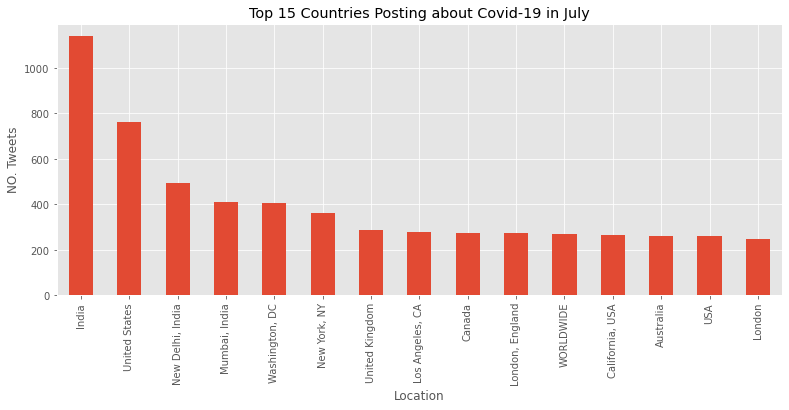

In [36]:
july = df['user_location'][pd.DatetimeIndex(df['date']).month == 7].value_counts()
fig, ax = plt.subplots(figsize = (13,5))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. Tweets", fontsize = 12)
july[0:15].plot(kind='bar', title = "Top 15 Countries Posting about Covid-19 in July", )

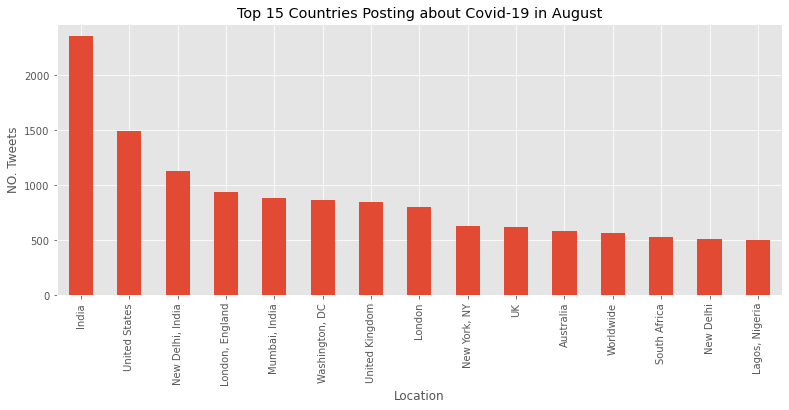

In [45]:
august = df['user_location'][pd.DatetimeIndex(df['date']).month == 8].value_counts()
fig, ax = plt.subplots(figsize = (13,5))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. Tweets", fontsize = 12)
august[0:15].plot(kind='bar', title = "Top 15 Countries Posting about Covid-19 in August", )

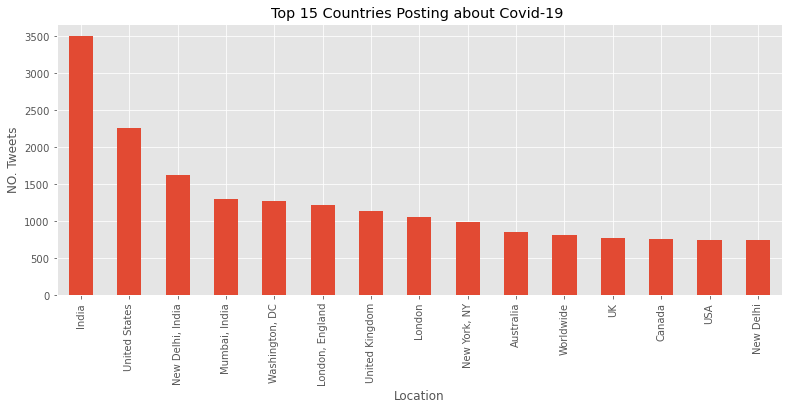

In [47]:
top_all_the_time = (top_august + top_july).sort_values(ascending = False)
fig, ax = plt.subplots(figsize = (13,5))
plt.xlabel("Location", fontsize = 12)
plt.ylabel("NO. Tweets", fontsize = 12)
top_all_the_time[0:15].plot(kind='bar', title = "Top 15 Countries Posting about Covid-19 ")

([<matplotlib.axis.XTick at 0x52a6db0>, <matplotlib.axis.XTick at 0x52a6d90>],
 [Text(0, 0, 'Unverified'), Text(0, 0, 'Verified')])

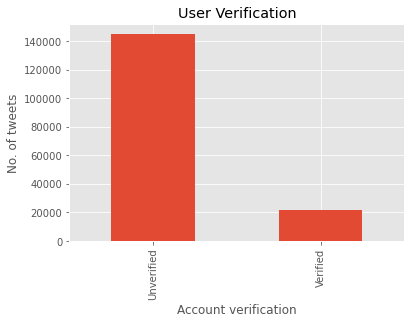

In [52]:
#USER VERIFICATION
user=df['user_verified'].value_counts()
user.plot(kind='bar')
plt.xlabel('Account verification')
plt.ylabel('No. of tweets')
plt.title('User Verification')
plt.xticks([False,True],['Unverified','Verified'])

In [53]:
tags=df['hashtags'].value_counts()

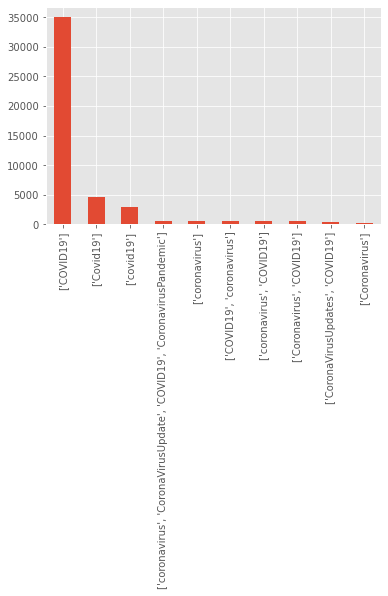

In [55]:
tags[0:10].plot(kind='bar')